In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

In [7]:
df=pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.shape

(7043, 21)

DATA CLEANING

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

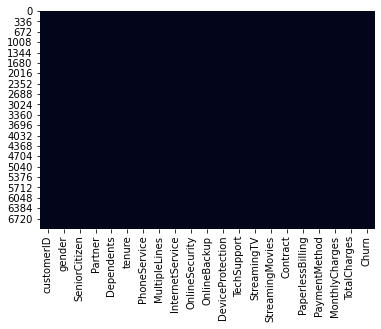

In [10]:
sns.heatmap(df.isnull(), cbar=False)
df.isnull().sum()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


AS the totalchaeges column is in object form converting it to float form, the errors part, gives NaN to non interger value

In [12]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

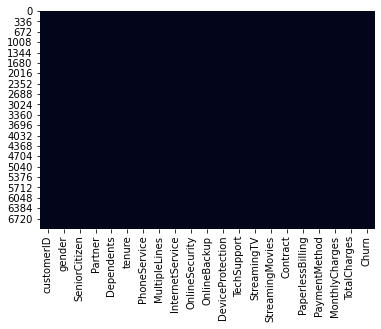

In [14]:
sns.heatmap(df.isnull(), cbar=False)
df.isnull().sum()

In [15]:
df.dropna(subset=["TotalCharges"], inplace=True)

In [16]:
df.drop('customerID',axis=1,inplace=True)

In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
df.shape

(7032, 20)

**EDA**

In [19]:
df_num=df.select_dtypes(exclude=["object_"])
df_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [20]:
df_cat=df.select_dtypes(include=["object_"])
df_cat.head()


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [21]:
corr_df=df.corr()
corr_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


This shows that direct correlation is between the tenure and total charges and it is logical. Also the monthly and total charge are correlated.

To check whether the totalcharges per tenure and the monthly charges are corelated more than this, then it would give a better understanding.

In [22]:
Charges_Per_Month=np.divide(df["TotalCharges"],df["tenure"])
df_num["Charges_Per_Month"]=Charges_Per_Month

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
corr_df=df_num.corr()
corr_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Charges_Per_Month
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.217616
tenure,0.015683,1.000000,0.246862,0.825880,0.246198
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.996237
TotalCharges,0.102411,0.825880,0.651065,1.000000,0.650915
Charges_Per_Month,0.217616,0.246198,0.996237,0.650915,1.000000


In [24]:
df_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Charges_Per_Month
0,0,1,29.85,29.85,29.850000
1,0,34,56.95,1889.50,55.573529
2,0,2,53.85,108.15,54.075000
3,0,45,42.30,1840.75,40.905556
4,0,2,70.70,151.65,75.825000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7eff003f3f10>,
      dtype=object)

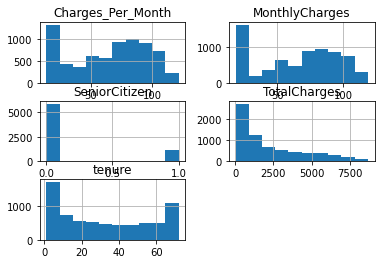

In [25]:
df_num.hist()

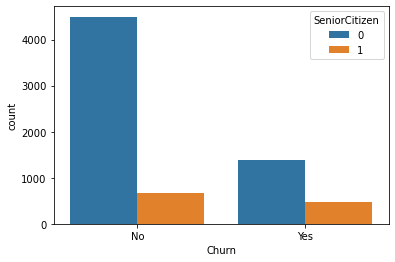

In [26]:
sns.countplot(x='Churn', hue='SeniorCitizen', data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


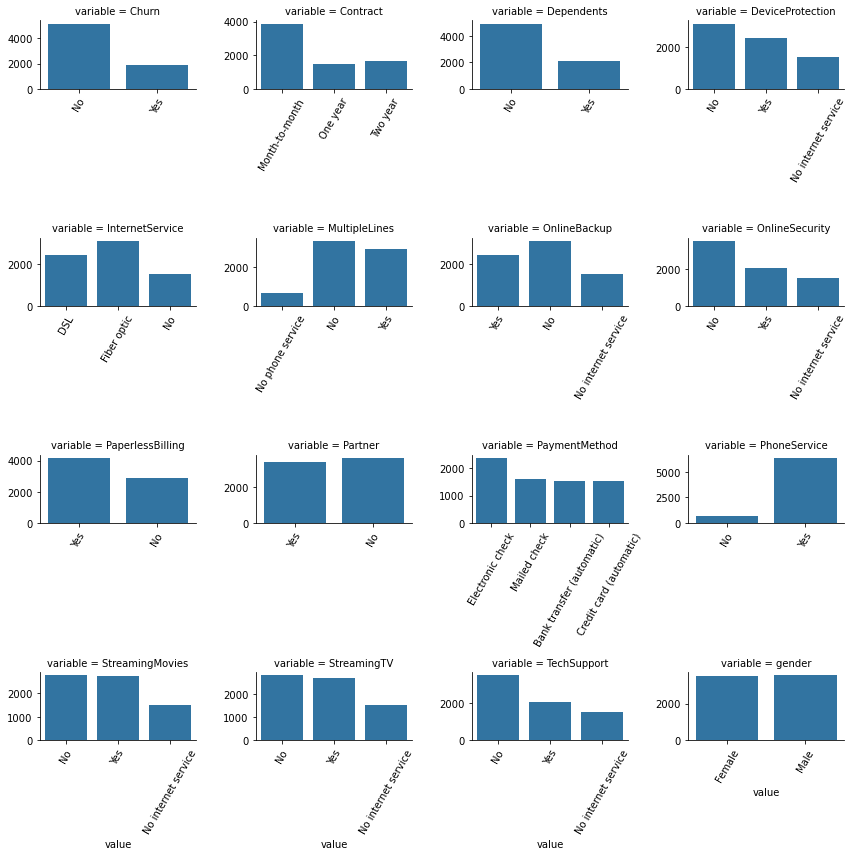

In [27]:
f=pd.melt(df,value_vars=sorted(df_cat))
g=sns.FacetGrid(f,col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation="vertical")
g=g.map(sns.countplot,'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [28]:
#To mix no service with no

df["MultipleLines"].replace(to_replace="No phone service", value="No", inplace=True)

df["OnlineSecurity"].replace(to_replace="No internet service", value="No", inplace=True)

df["OnlineBackup"].replace(to_replace="No internet service", value="No", inplace=True)

df["DeviceProtection"].replace(to_replace="No internet service", value="No", inplace=True)

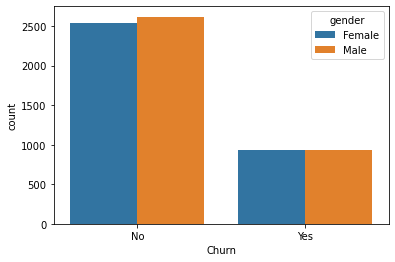

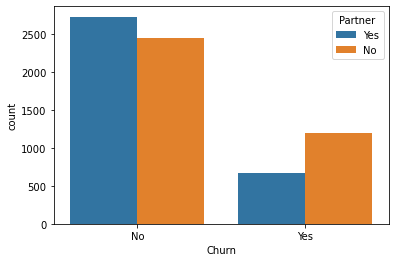

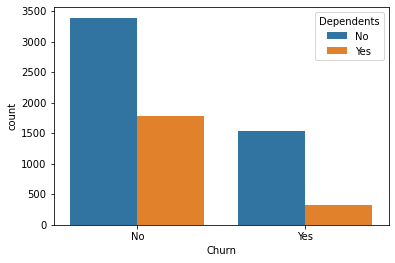

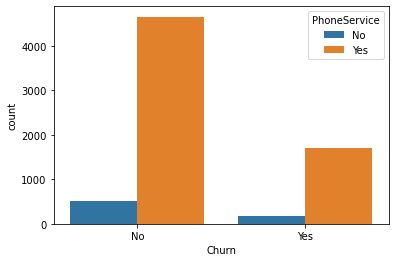

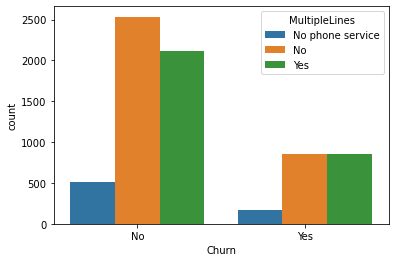

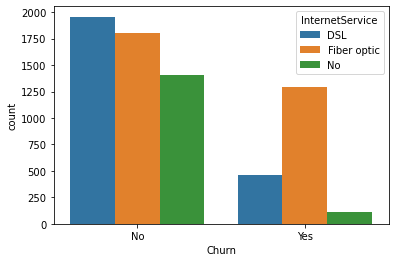

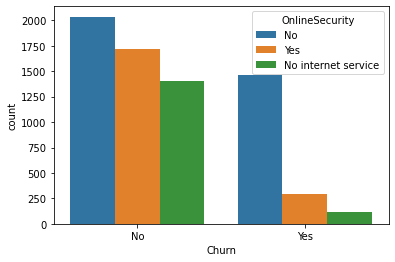

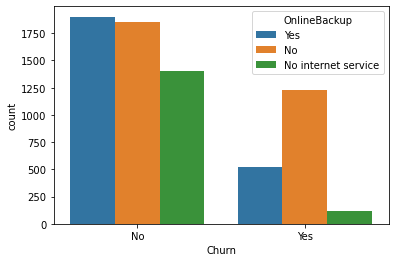

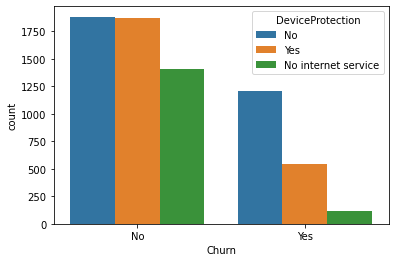

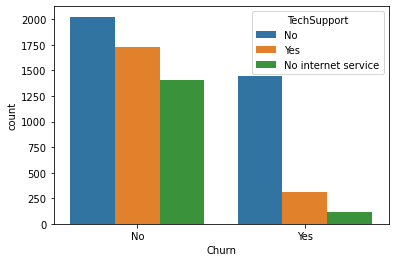

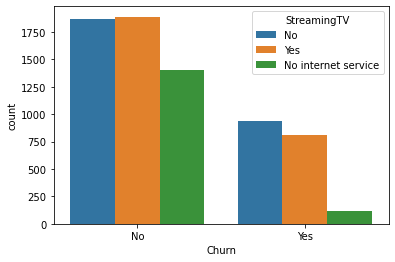

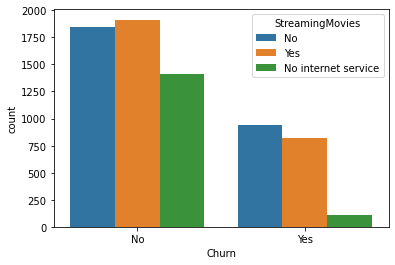

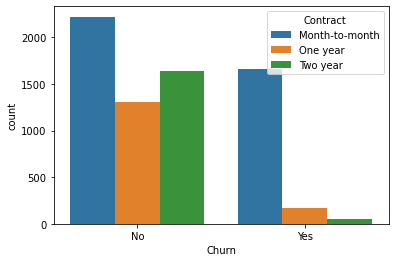

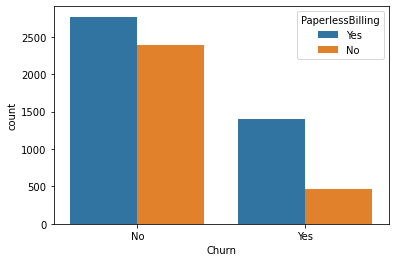

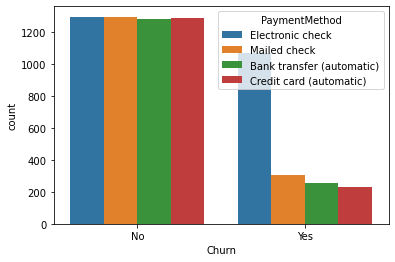

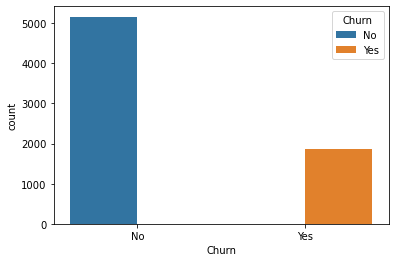

In [29]:
for a in df_cat.columns:
    sns.countplot(x='Churn', hue=a, data=df_cat)
    plt.show(block='False')  

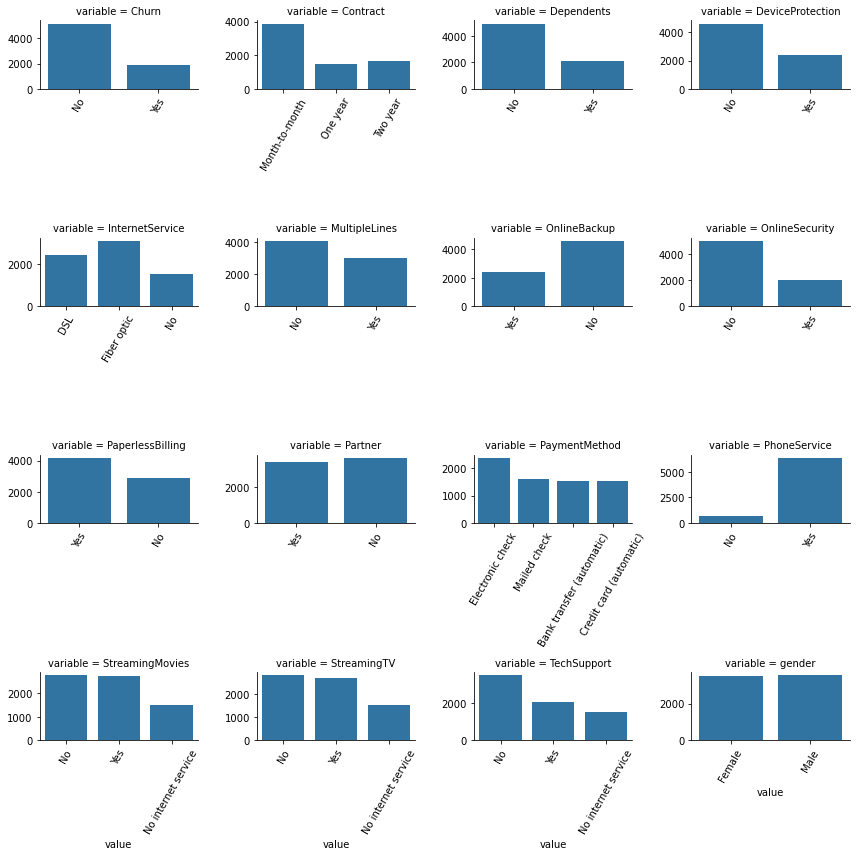

In [30]:
f=pd.melt(df,value_vars=sorted(df_cat))
g=sns.FacetGrid(f,col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation="vertical")
g=g.map(sns.countplot,'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [31]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

df['Partner']=label_encoder.fit_transform(df['Partner'])
df['MultipleLines']=label_encoder.fit_transform(df['MultipleLines'])
df['InternetService']=label_encoder.fit_transform(df['InternetService'])
df['OnlineSecurity']=label_encoder.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']=label_encoder.fit_transform(df['OnlineBackup'])
df['DeviceProtection']=label_encoder.fit_transform(df['DeviceProtection'])
df['Contract']=label_encoder.fit_transform(df['Contract'])
df['PaperlessBilling']=label_encoder.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=label_encoder.fit_transform(df['PaymentMethod'])
df['Churn']=label_encoder.fit_transform(df['Churn'])
print(df.dtypes)

gender               object
SeniorCitizen         int64
Partner               int64
Dependents           object
tenure                int64
PhoneService         object
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


In [32]:
df.drop('PhoneService',axis=1,inplace=True)
df.drop('gender',axis=1,inplace=True)
df.drop('Dependents',axis=1,inplace=True)
df.drop('TechSupport',axis=1,inplace=True)
df.drop('StreamingTV',axis=1,inplace=True)
df.drop('StreamingMovies',axis=1,inplace=True)
print(df.dtypes)

SeniorCitizen         int64
Partner               int64
tenure                int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


In [33]:
df.head()

,SeniorCitizen,Partner,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,1,0,0,0,1,0,0,1,2,29.85,29.85,0
1,0,0,34,0,0,1,0,1,1,0,3,56.95,1889.50,0
2,0,0,2,0,0,1,1,0,0,1,3,53.85,108.15,1
3,0,0,45,0,0,1,0,1,1,0,0,42.30,1840.75,0
4,0,0,2,0,1,0,0,0,0,1,2,70.70,151.65,1


In [34]:
y=df["Churn"]
y.shape

(7032,)

In [35]:
#no=0, tes=1
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [36]:
x=df.loc[:, df.columns!='Churn']
x.head()

,SeniorCitizen,Partner,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,1,0,0,0,1,0,0,1,2,29.85,29.85
1,0,0,34,0,0,1,0,1,1,0,3,56.95,1889.50
2,0,0,2,0,0,1,1,0,0,1,3,53.85,108.15
3,0,0,45,0,0,1,0,1,1,0,0,42.30,1840.75
4,0,0,2,0,1,0,0,0,0,1,2,70.70,151.65


In [37]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

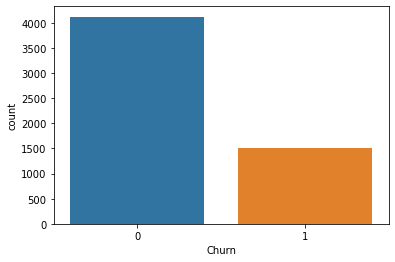

In [38]:
sns.countplot(yTrain)

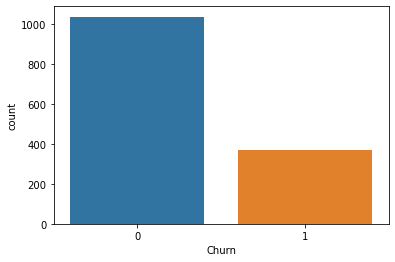

In [39]:
sns.countplot(yTest)

In [40]:
#Standardising the data

scaler=preprocessing.StandardScaler()
x=scaler.fit_transform(x)
x

array([[-0.44032709,  1.03561683, -1.28024804, ...,  0.39980518,
        -1.16169394, -0.99419409],
       [-0.44032709, -0.9656081 ,  0.06430269, ...,  1.33663626,
        -0.26087792, -0.17373982],
       [-0.44032709, -0.9656081 , -1.23950408, ...,  1.33663626,
        -0.36392329, -0.95964911],
       ...,
       [-0.44032709,  1.03561683, -0.87280842, ...,  0.39980518,
        -1.17000405, -0.85451414],
       [ 2.27103902,  1.03561683, -1.15801615, ...,  1.33663626,
         0.31916782, -0.87209546],
       [-0.44032709, -0.9656081 ,  1.36810945, ..., -1.47385696,
         1.35793167,  2.01234407]])

In [41]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds=StratifiedKFold(n_splits=10, random_state=42)

#Gradient Boost Classifier

from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier(random_state=41)

clone_clf=clone(gb_clf)

clone_clf.fit(xTrain,yTrain)
y_pred=clone_clf.predict(xTest)
n_correct=sum(y_pred==yTest)
print("Result for GBC", n_correct/len(y_pred))
    

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Result for GBC 0.8017057569296375


In [42]:
from sklearn.svm import SVC
svc_clf=SVC(random_state=42)

clone_clf=clone(svc_clf)

clone_clf.fit(xTrain,yTrain)
y_pred=clone_clf.predict(xTest)
n_correct=sum(y_pred==yTest)
print("Result for SVM", n_correct/len(y_pred))
    

Result for SVM 0.7377398720682303


In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc_clf=RandomForestClassifier(random_state=42)

clone_clf=clone(rfc_clf)

clone_clf.fit(xTrain,yTrain)
y_pred=clone_clf.predict(xTest)
n_correct=sum(y_pred==yTest)
print("Result for RandomForestClassifier", n_correct/len(y_pred))


Result for RandomForestClassifier 0.7867803837953091


In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier()

clone_clf=clone(knn_clf)

clone_clf.fit(xTrain,yTrain)
y_pred=clone_clf.predict(xTest)
n_correct=sum(y_pred==yTest)
print("Result for KNeighborsClassifierr", n_correct/len(y_pred))

Result for KNeighborsClassifierr 0.7619047619047619


In [46]:
from sklearn.tree import DecisionTreeClassifier

dtc_clf=DecisionTreeClassifier(random_state=42)

clone_clf=clone(dtc_clf)

clone_clf.fit(xTrain,yTrain)
y_pred=clone_clf.predict(xTest)
n_correct=sum(y_pred==yTest)
print("Result for DecisionTreeClassifier", n_correct/len(y_pred))

Result for DecisionTreeClassifier 0.7370291400142146


In [47]:
from sklearn.linear_model import LogisticRegression

lr_clf=LogisticRegression(random_state=42)

clone_clf=clone(lr_clf)

clone_clf.fit(xTrain,yTrain)
y_pred=clone_clf.predict(xTest)
n_correct=sum(y_pred==yTest)
print("Result for LogisticRegression", n_correct/len(y_pred))

Result for LogisticRegression 0.7967306325515281


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [48]:
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(gb_clf,x,y,cv=10)

from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)



array([[4657,  506],
       [ 898,  971]])

In [49]:
from sklearn.metrics import precision_score, recall_score

print("Precision",precision_score(y,y_pred))
print("recall",recall_score(y,y_pred))

Precision 0.6574136763710223
recall 0.5195291599785982


In [50]:
y_scores=cross_val_predict(gb_clf,x,y,cv=10, method="decision_function")

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds=precision_recall_curve(y,y_scores)

NameError: name 'plot' is not defined

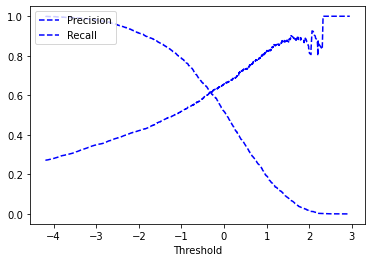

In [51]:
#Precision recall curve

def plot_curve(precisions, recalls, thresholds):
    plt.plot(thresholds,precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds,recalls[:-1], "b--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plot.ylim([0,1])

plot_curve(precisions, recalls, thresholds)
plt.show()




Text(0, 0.5, 'Precision')

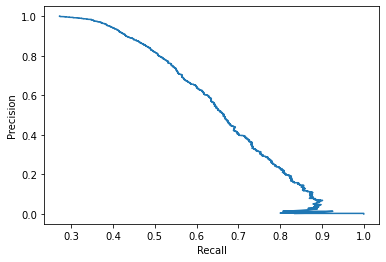

In [52]:
plt.plot(precisions, recalls)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [53]:
y_new_scores=(y_scores>-0.5)
print("New Precision:", precision_score(y,y_new_scores))
print("New Recall:", recall_score(y,y_new_scores))

New Precision: 0.583725305738476
New Recall: 0.6639914392723382


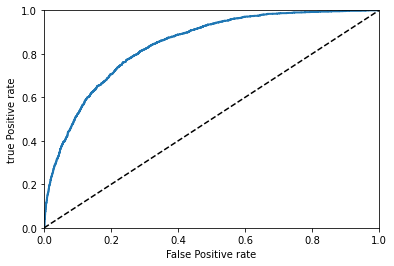

In [54]:
from sklearn.metrics import roc_curve
fpr,tpr, thresholds=roc_curve(y,y_scores)

def plot_roc(fpr,tpr, label=None):
    plt.plot(fpr,tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],"k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive rate")
    plt.ylabel("true Positive rate")

plot_roc(fpr,tpr, label=None)
plt.show()